In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv");

In [3]:
for column in df.columns:
    print(column)
    print(df[column].unique())

 Destination Port
[54865 55054 55055 ... 39950 61301 61326]
 Flow Duration
[    3   109    52 ... 55637 53596 21000]
 Total Fwd Packets
[   2    1    3   20   15    4    5    8   29    6   14   41   47   46
   45   27   23   26   51   50   48   52   49   21   42   43   44   78
   53   31   19   69   22   25   24   30   68   40   39   75   28   12
   17   18   13    7   11   38    9 1611   70   10  124   33   34   16
   54  225   56   32  220  103  390   97   58   72  111   85   71   73
   61   55   35  209  205  149  212  108   98   37  188  101   65   36
  114   91  246  100   62  102  105   79  106  122  277   76  126   82
   96  196   84  263   77   93   63   74   81   66  354  175   64  117
  107   92  457   67  142  135  116   60  143  112  120  155  214  201
  187  519  128  136  194  146  216  250  127  352  176  537  104   83
   99   59  171  251  298 1681  256  158  535  573  226  599  309  339
  315  481   57  200   95   94  145  161  110  249  164  317  350  474
  274  207  

In [4]:
num=[]
cat=[]
for column in df.columns:
  if df[column].dtype == 'O':
    cat.append(column)
  else:
    num.append(column)

In [5]:
nullAttr=[]
for column in df.columns:
  if df[column].isnull().sum() != 0:
    nullAttr.append(column)

nullAttr

['Flow Bytes/s']

In [6]:
for column in num:
    df[column] = df[column].fillna(df[column].mean())

In [7]:
nullAttr=[]
for column in df.columns:
  if df[column].isnull().sum() != 0:
    nullAttr.append(column)

nullAttr

[]

In [8]:
for id in num:
    # Calculate upper bound and replace values
    iqr = df[id].quantile(0.75) - df[id].quantile(0.25)
    upper_bound = df[id].quantile(0.75) + 1.5 * iqr
    lower_bound = df[id].quantile(0.25) - 1.5 * iqr
    
    # Ensure upper_bound is of the same dtype as df[id]
    upper_bound = upper_bound.astype(df[id].dtype)
    
    # Replace values greater than upper_bound with upper_bound
    df.loc[df[id] >= upper_bound, id] = upper_bound

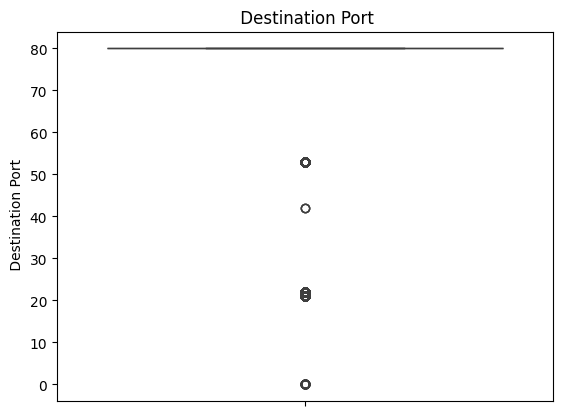

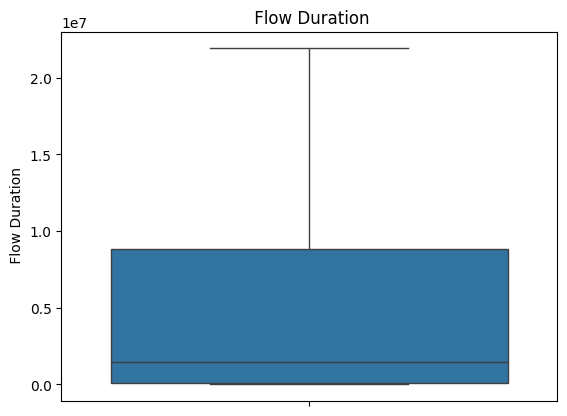

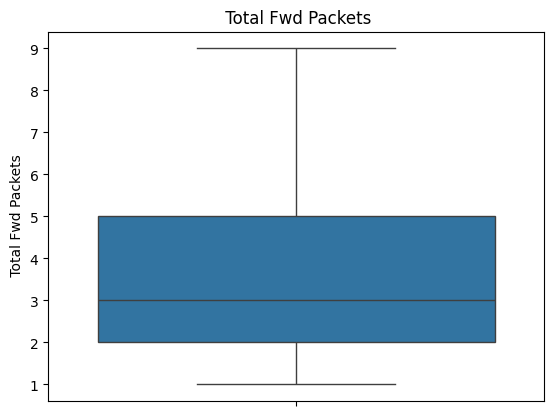

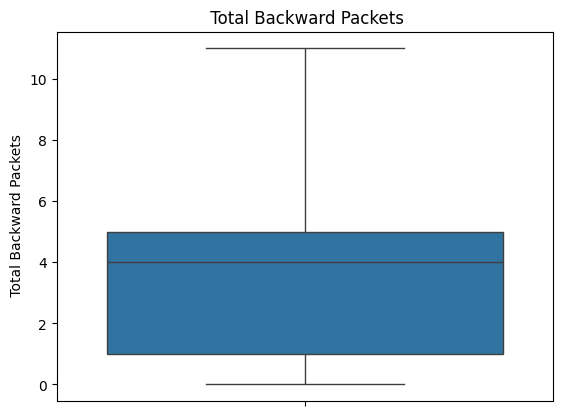

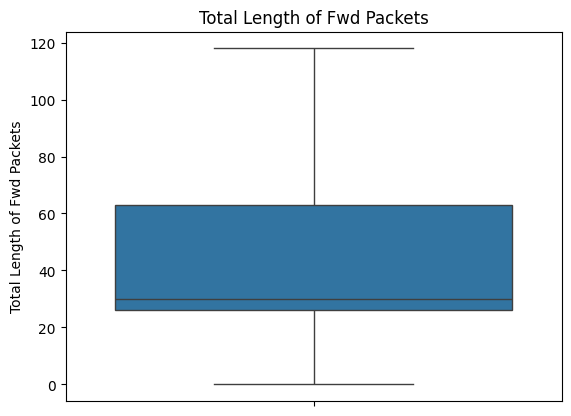

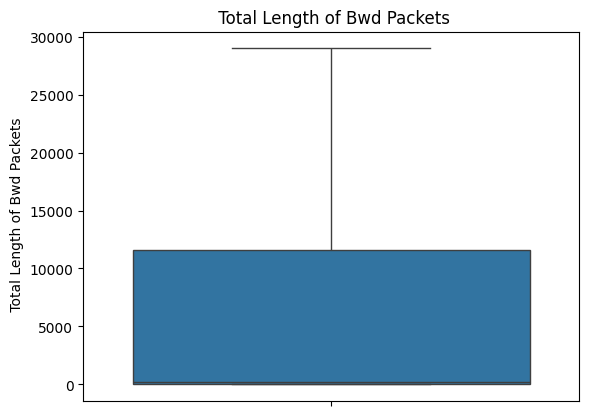

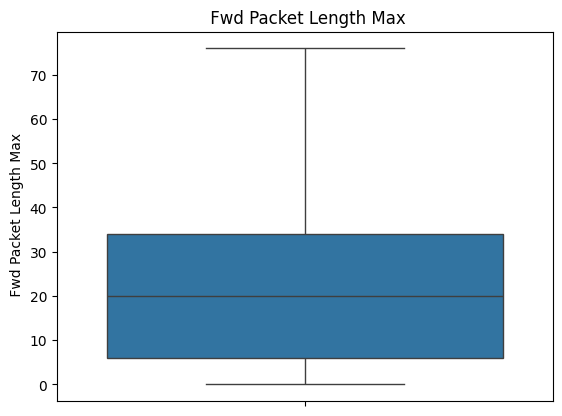

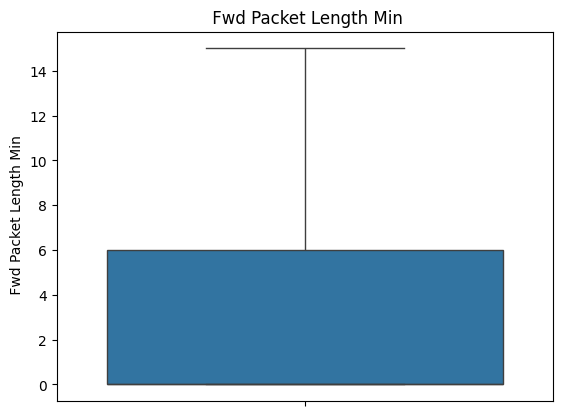

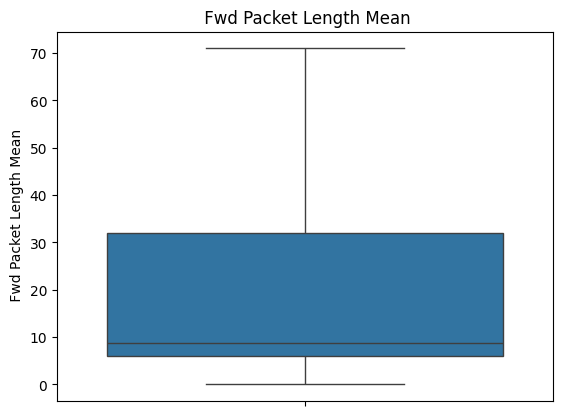

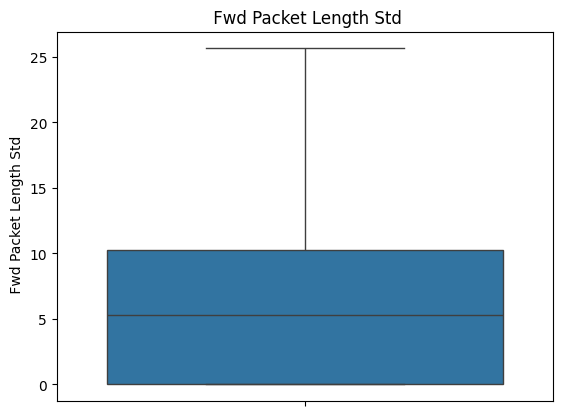

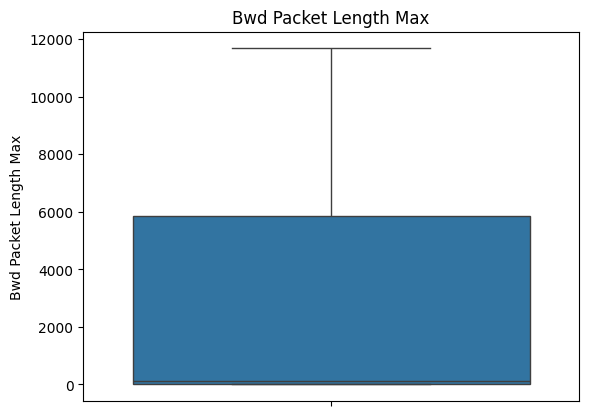

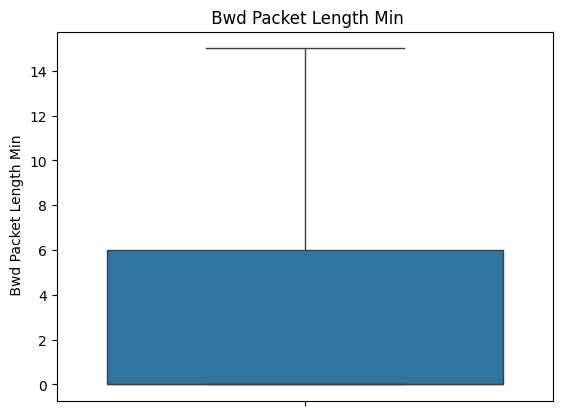

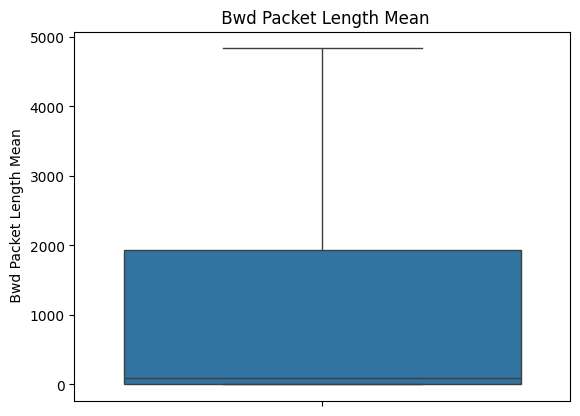

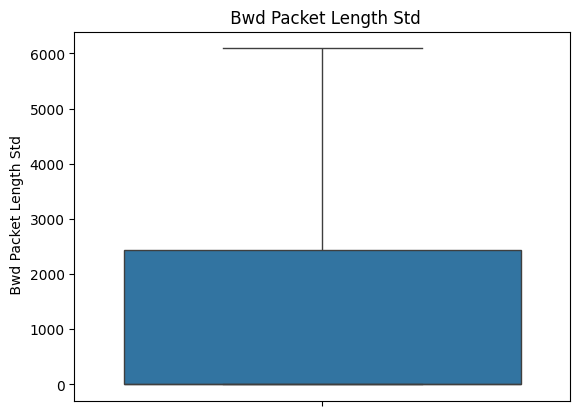

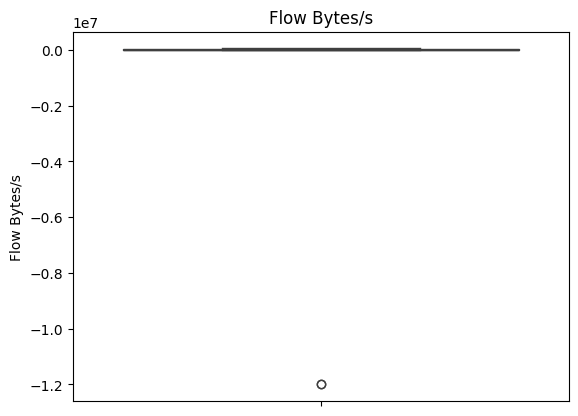

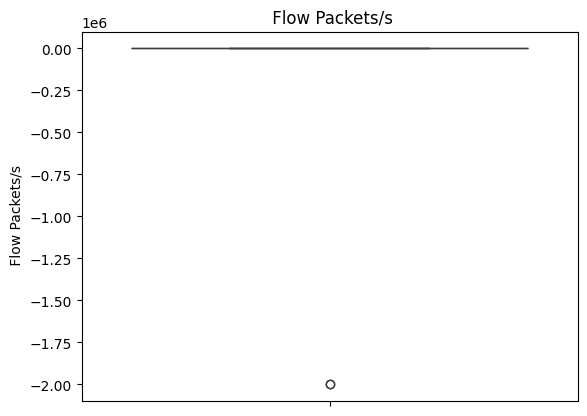

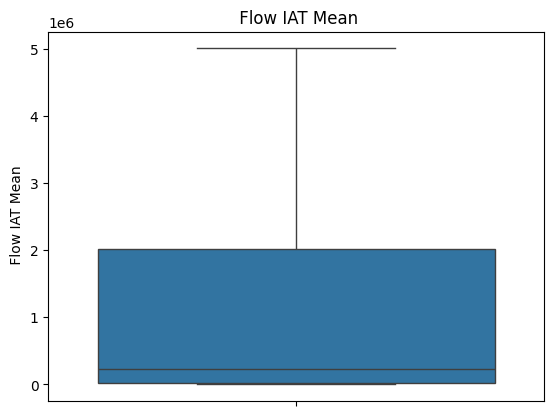

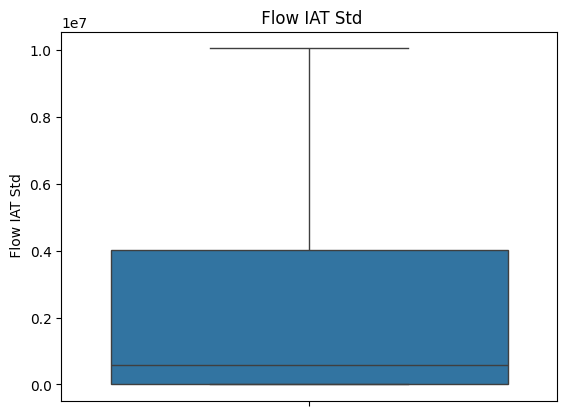

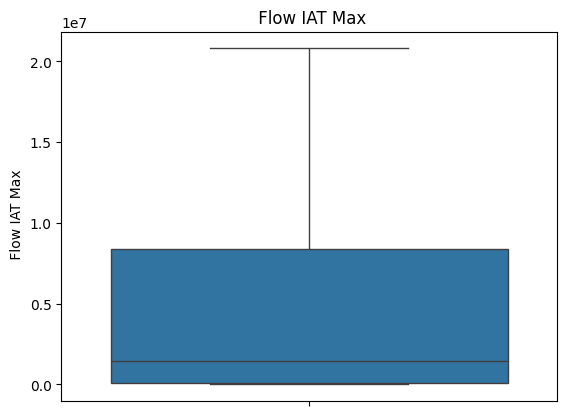

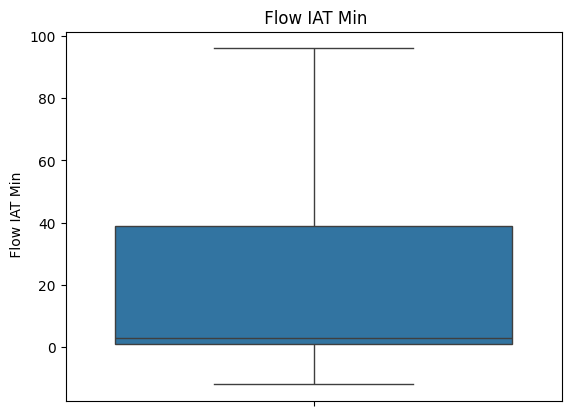

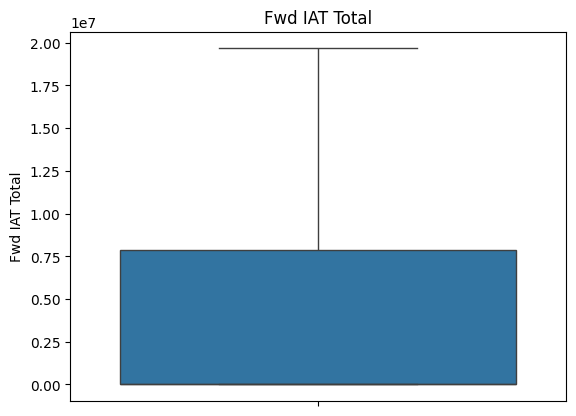

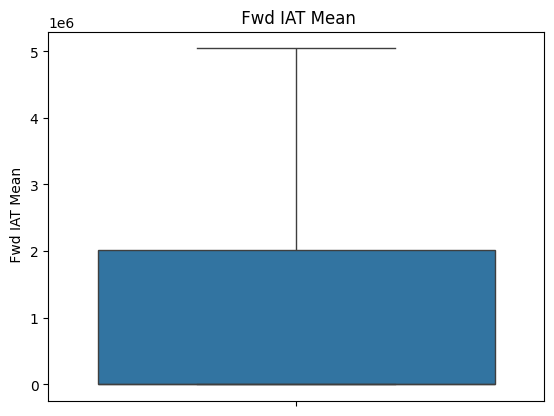

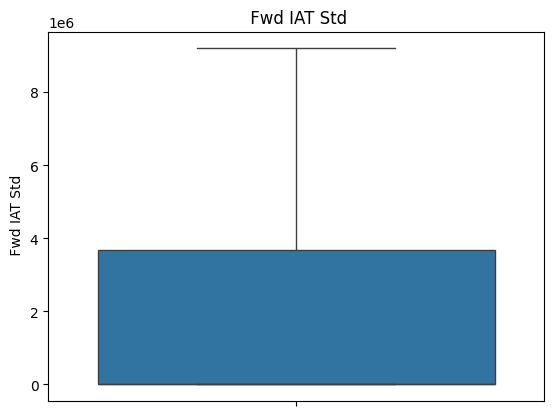

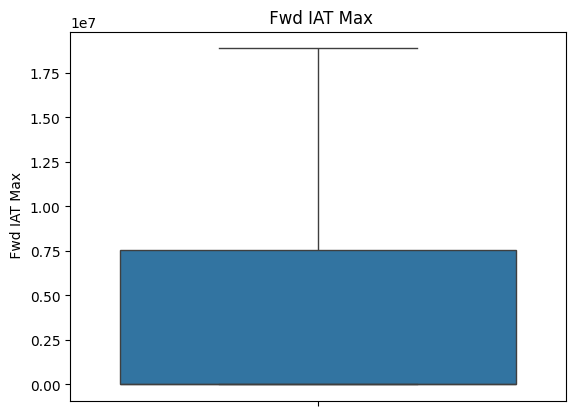

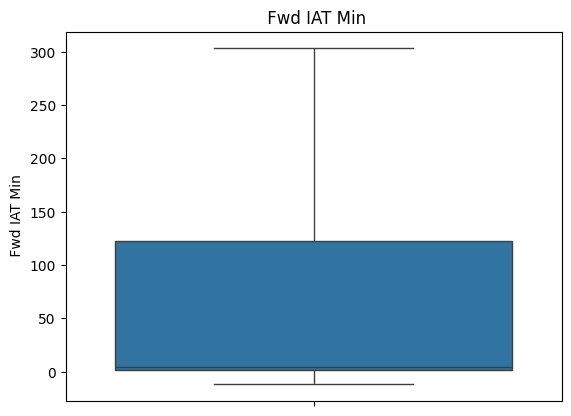

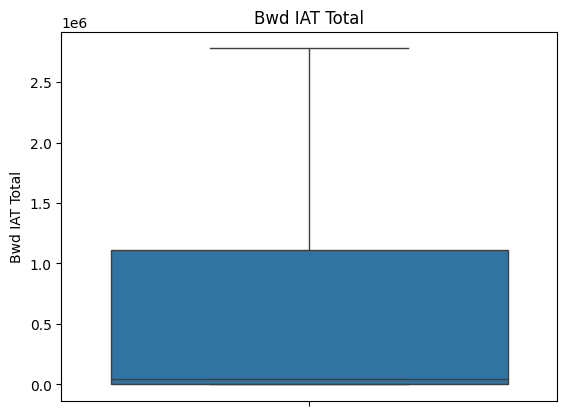

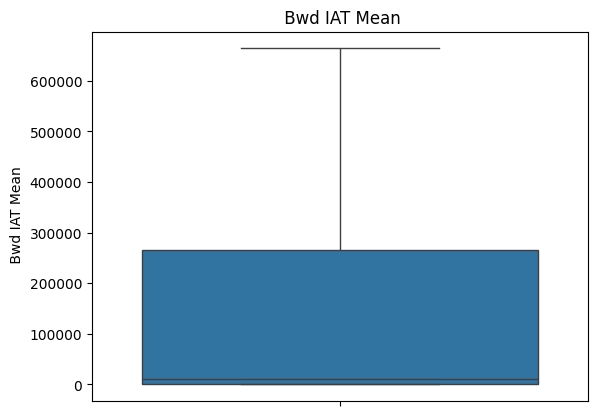

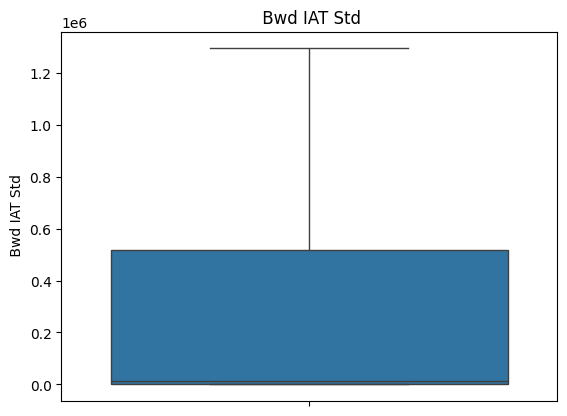

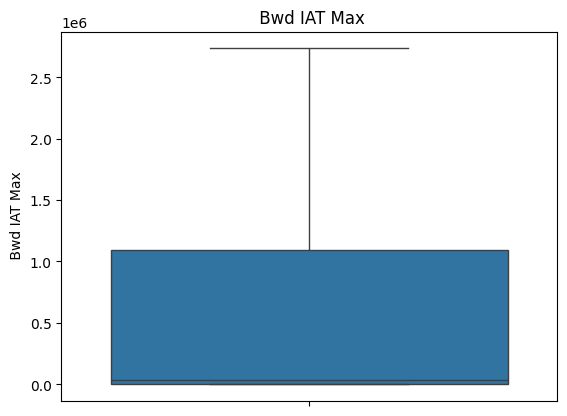

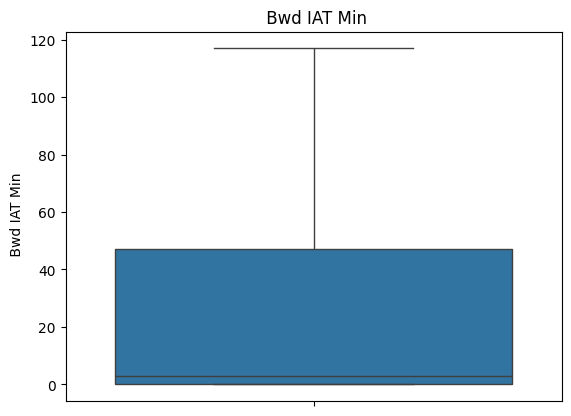

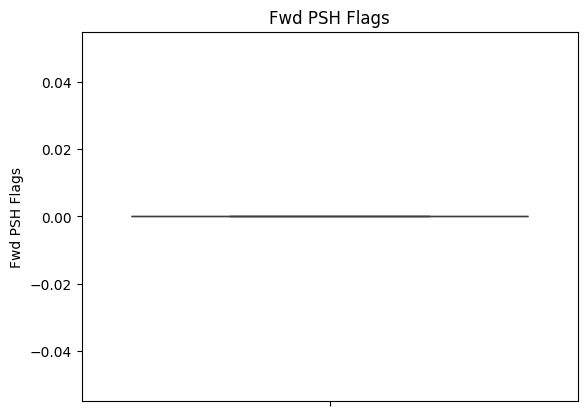

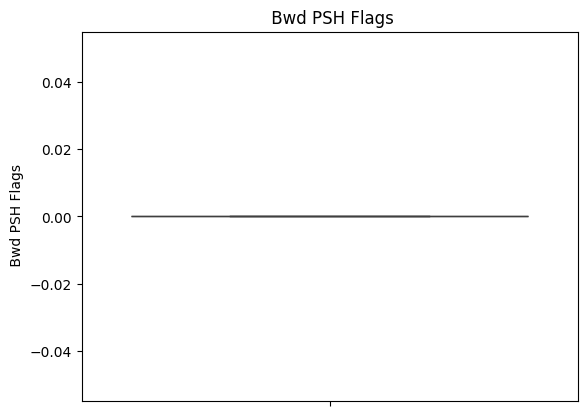

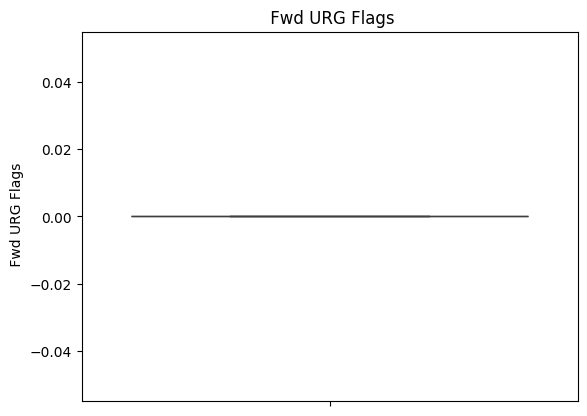

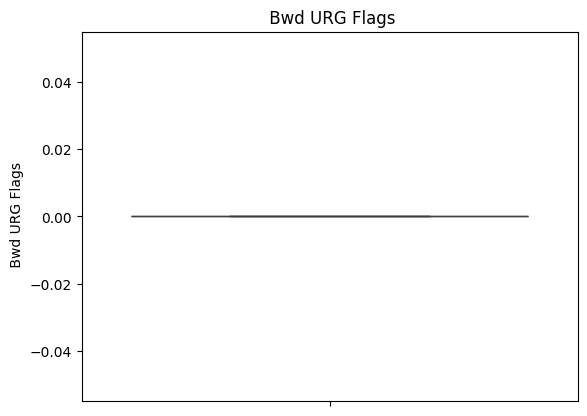

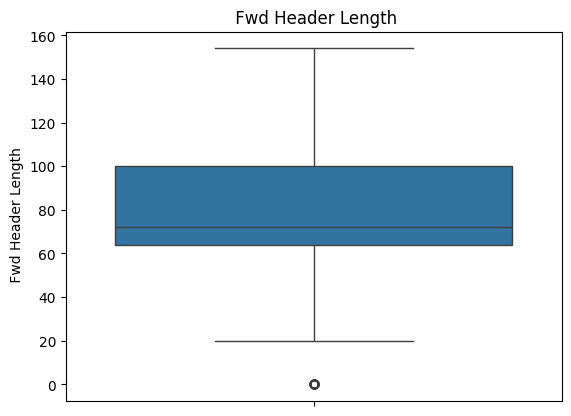

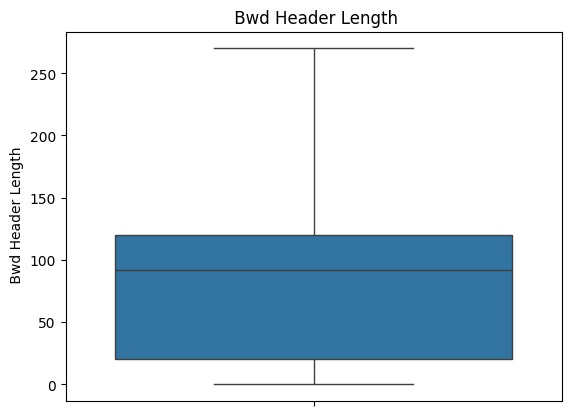

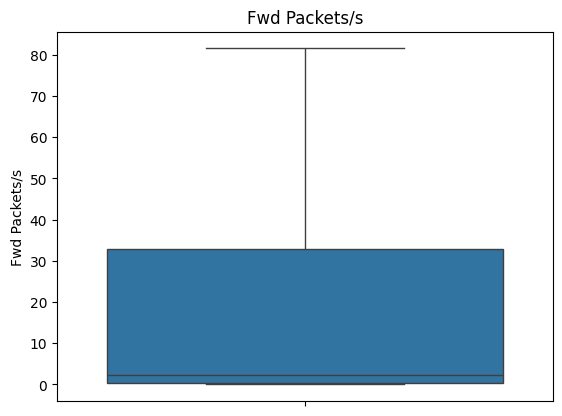

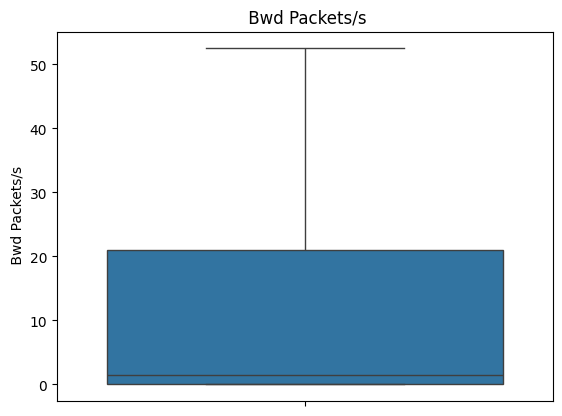

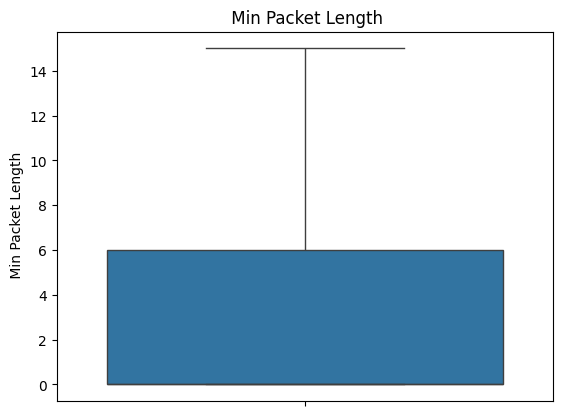

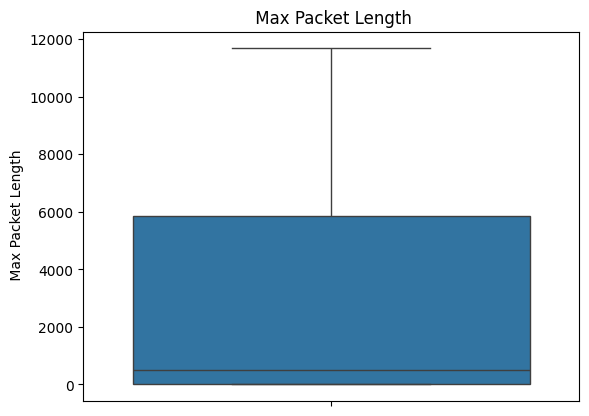

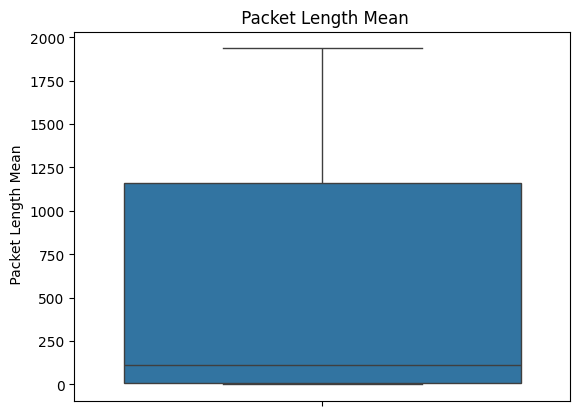

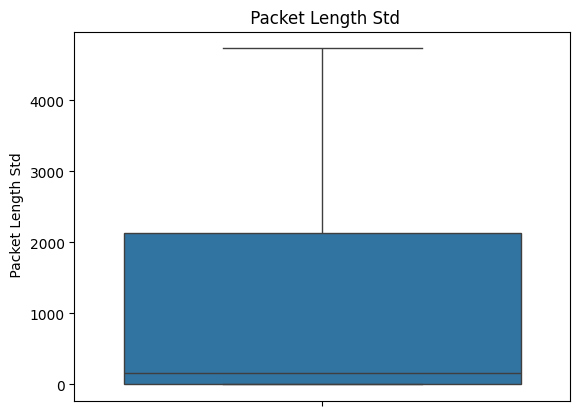

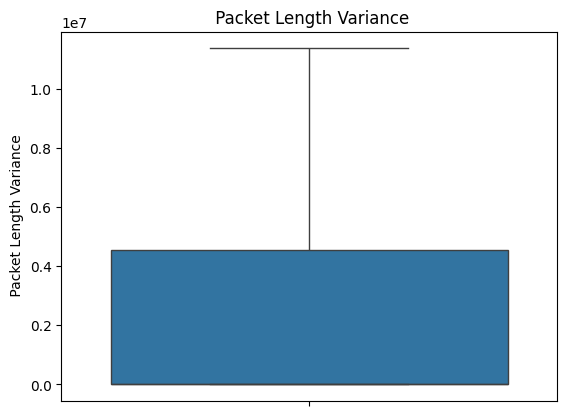

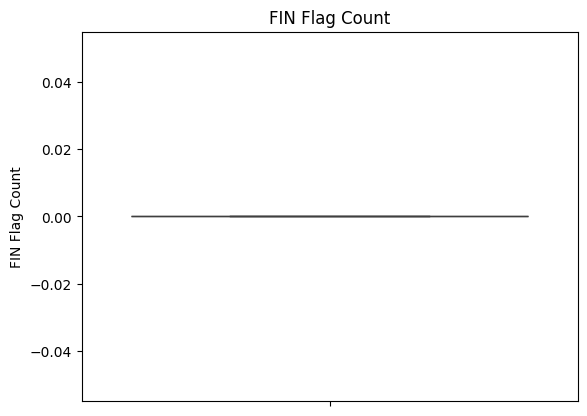

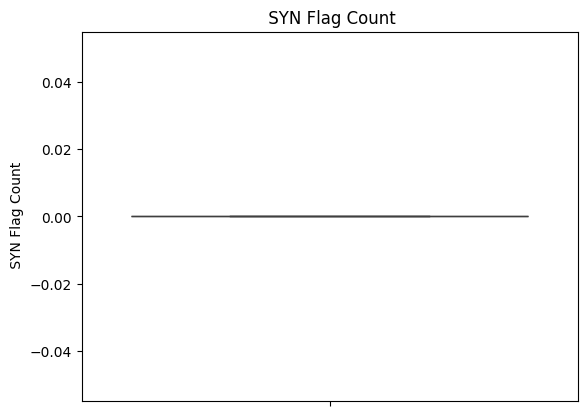

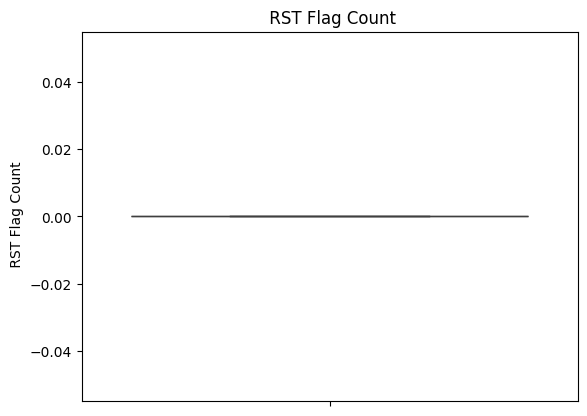

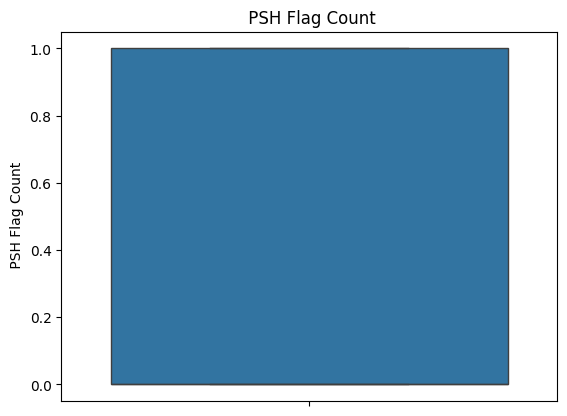

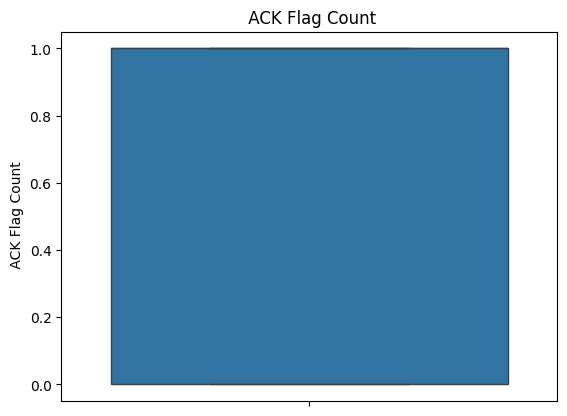

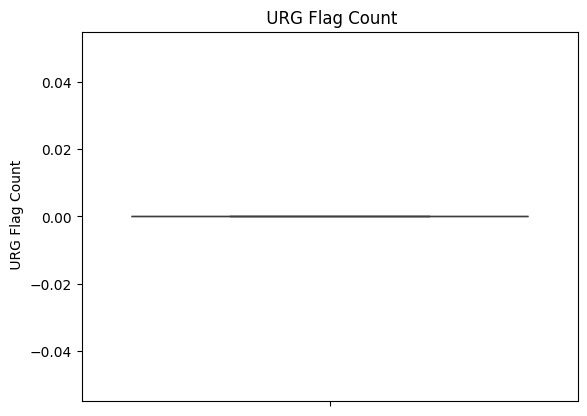

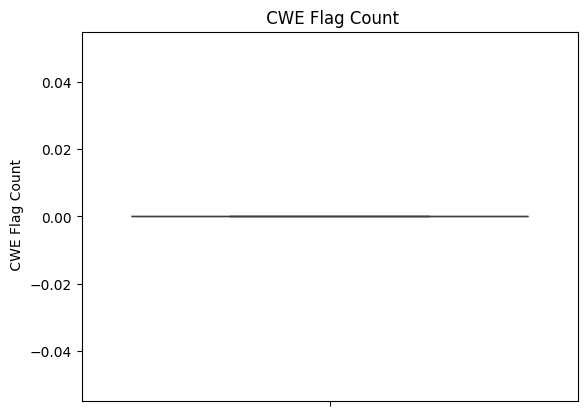

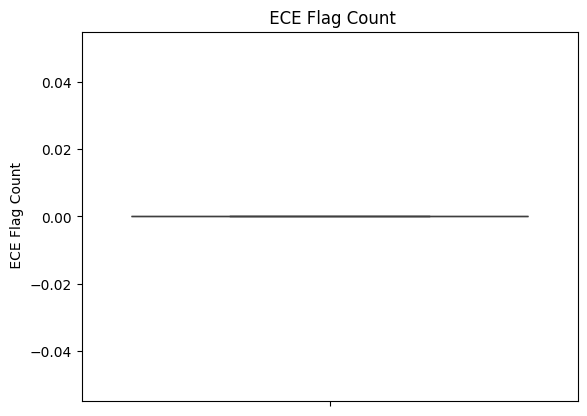

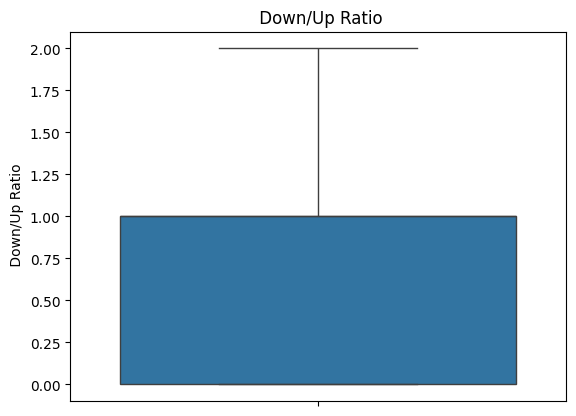

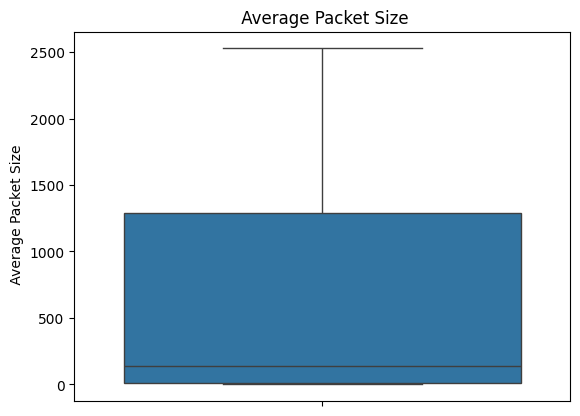

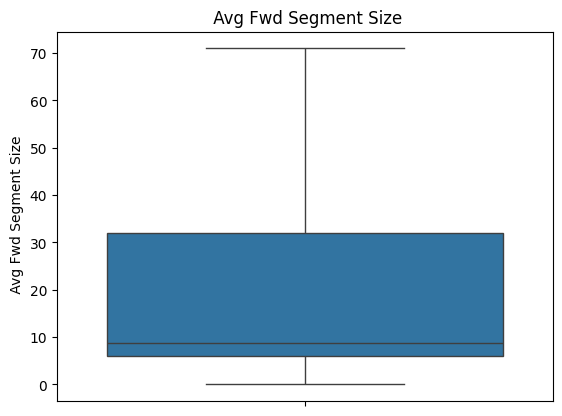

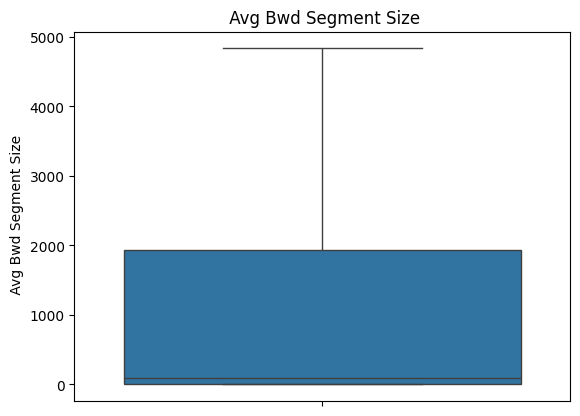

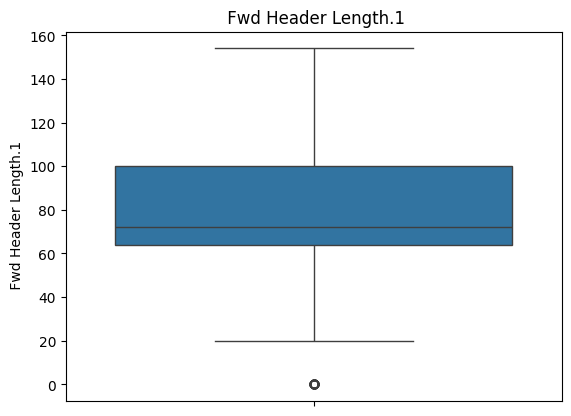

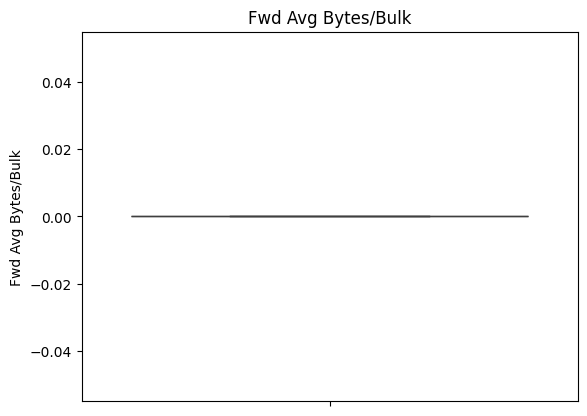

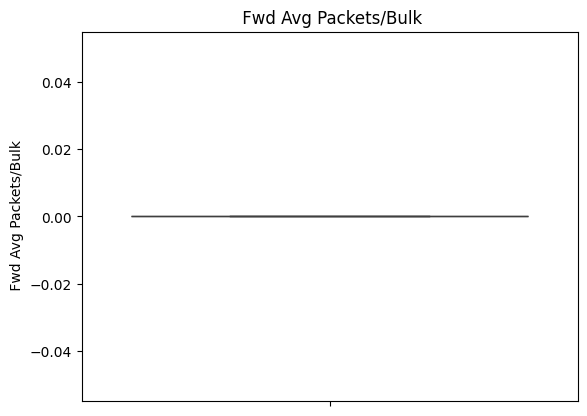

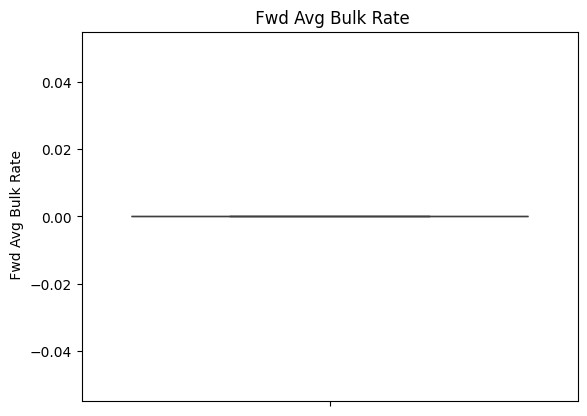

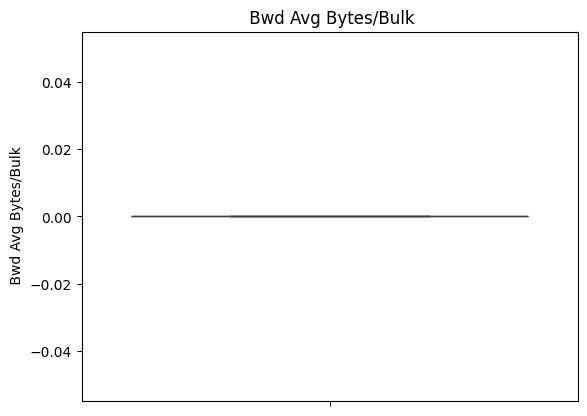

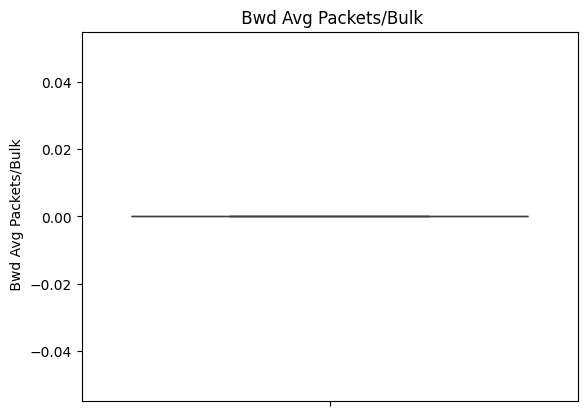

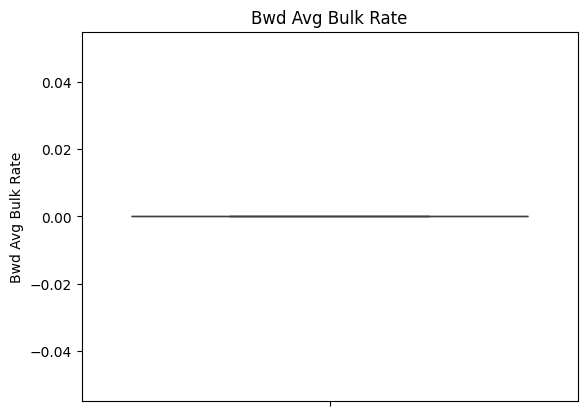

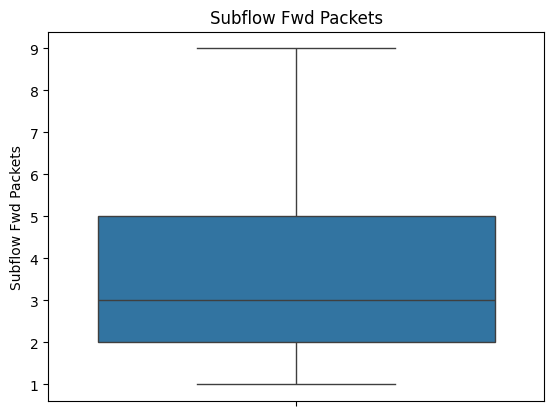

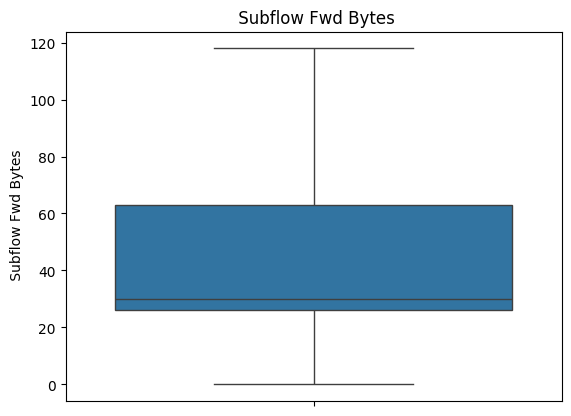

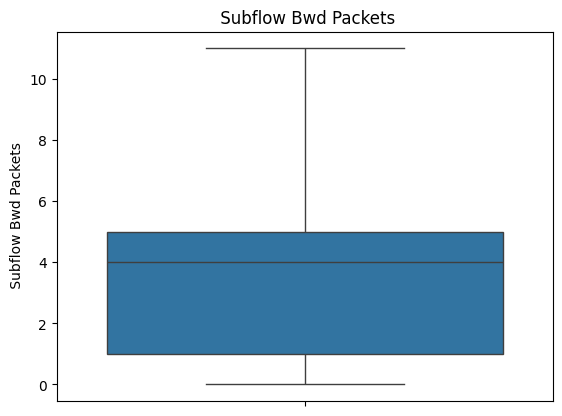

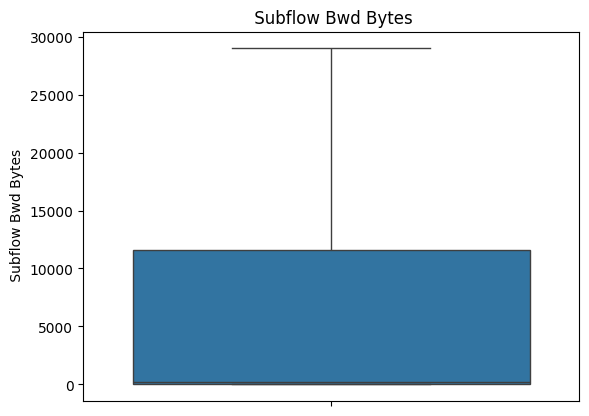

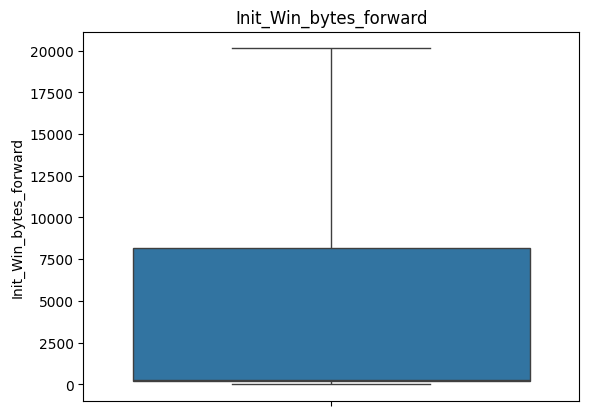

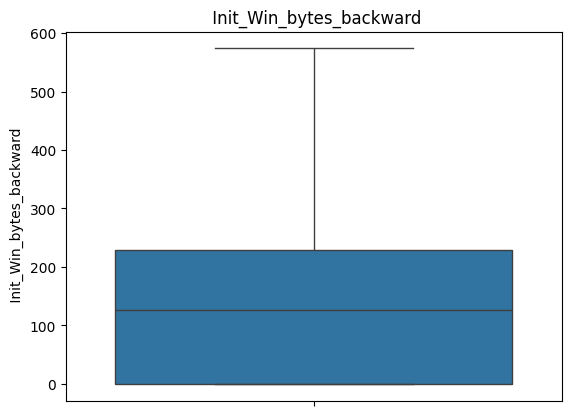

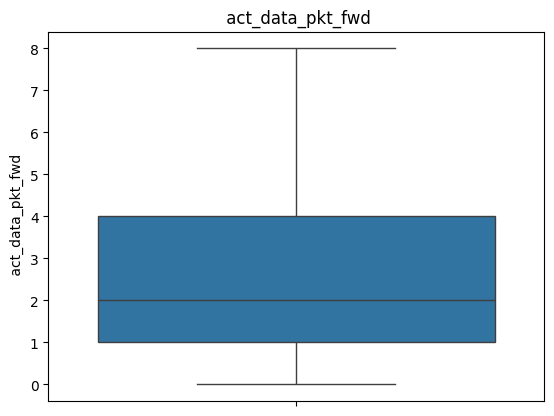

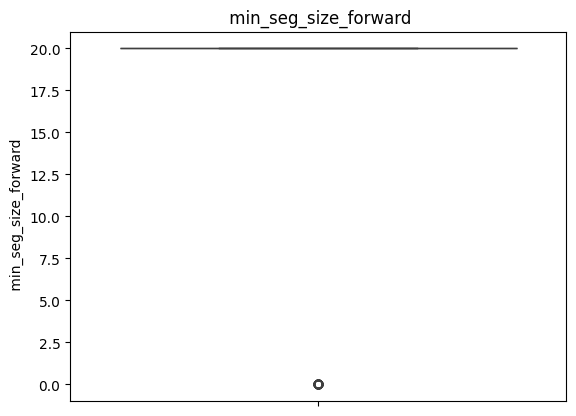

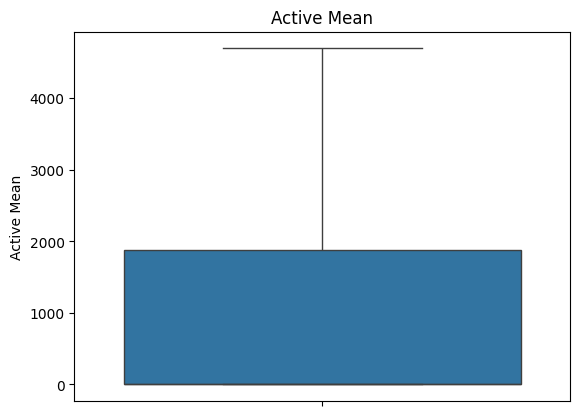

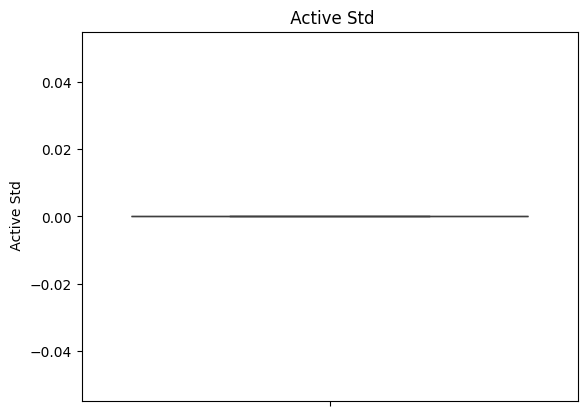

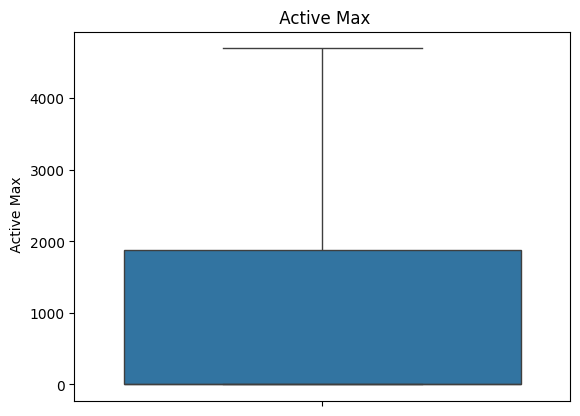

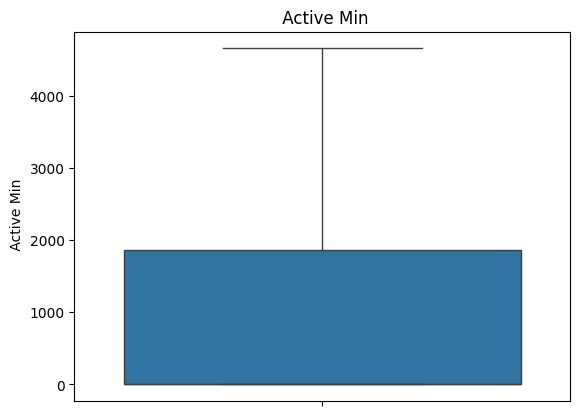

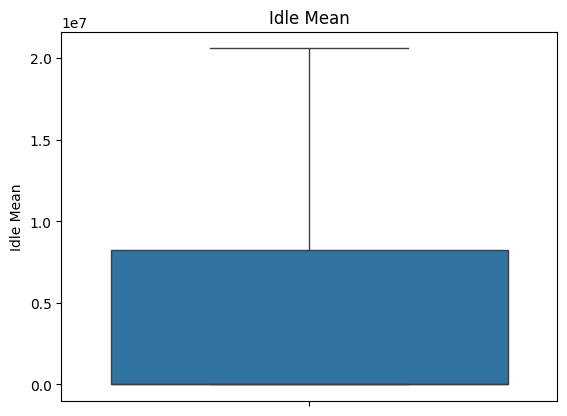

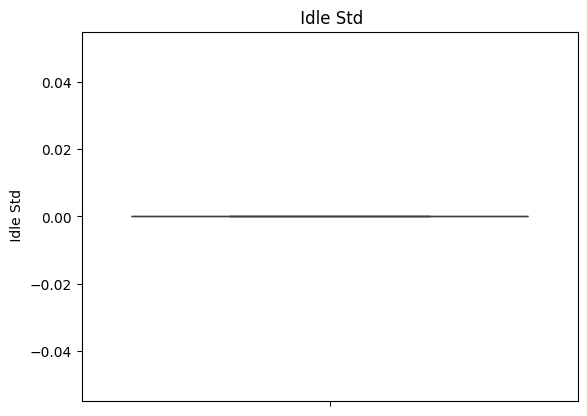

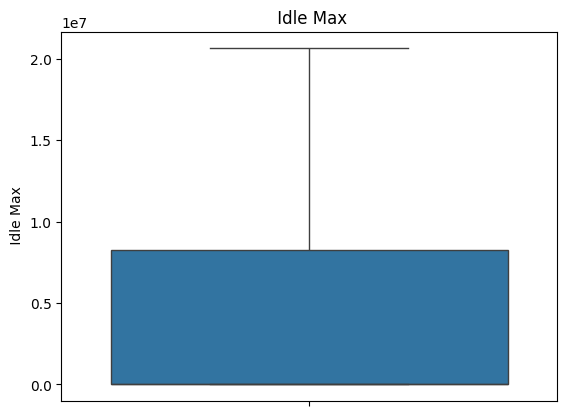

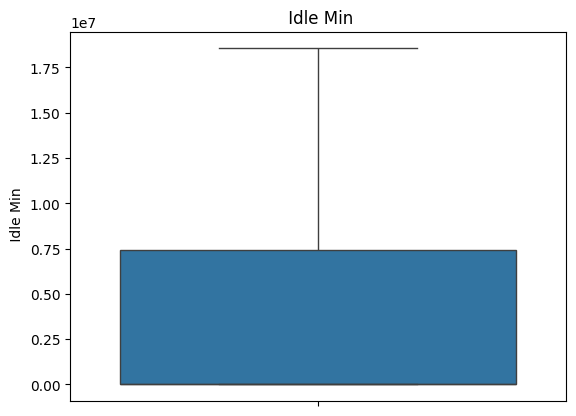

In [9]:
import matplotlib.pyplot as plt

for column in num:
  plt.figure()
  sns.boxplot(df[column])
  plt.title(column)
  plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat:
  df[col] = le.fit_transform(df[col])

y = df[' Label']
X = df.drop(' Label', axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\subha\appdata\local\programs\python\python312\lib\site-packages (2.16.1)
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.1 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.1/377.1 MB 2.2 MB/s eta 0:02:54
   ---------------------------------------- 0.2/377.1 MB 1.5 MB/s eta 0:04:11
   ---------------------------------------- 0.4/377.1 MB 2.3 MB/s eta 0:02:44
   ---------------------------------------- 0.5/377.1 MB 2.7 MB/s eta 0:02:21
   ---------------------------------------- 0.8/377.1 MB 3.1 MB/s eta 0:02:03
   ---------------------------------------- 1.0/377.1 MB 3.7 MB/s eta 0:01:42
   ---------------------------------------- 1.2/377.1 MB 3.6 MB/s eta 0:01:46
   ---------------------------------------- 1.6/377.1 MB 4.4 MB/s eta 0:01:26
   --------------------------------

  You can safely remove it manually.



   ----------- -------------------------- 116.8/377.1 MB 507.9 kB/s eta 0:08:33
   ----------- -------------------------- 116.8/377.1 MB 509.1 kB/s eta 0:08:32
   ----------- -------------------------- 116.8/377.1 MB 508.3 kB/s eta 0:08:32
   ----------- -------------------------- 116.9/377.1 MB 508.7 kB/s eta 0:08:32
   ----------- -------------------------- 116.9/377.1 MB 508.3 kB/s eta 0:08:32
   ----------- -------------------------- 116.9/377.1 MB 509.1 kB/s eta 0:08:32
   ----------- -------------------------- 116.9/377.1 MB 507.5 kB/s eta 0:08:33
   ----------- -------------------------- 117.0/377.1 MB 509.5 kB/s eta 0:08:31
   ----------- -------------------------- 117.0/377.1 MB 509.9 kB/s eta 0:08:31
   ----------- -------------------------- 117.0/377.1 MB 509.5 kB/s eta 0:08:31
   ----------- -------------------------- 117.0/377.1 MB 509.1 kB/s eta 0:08:31
   ----------- -------------------------- 117.0/377.1 MB 507.5 kB/s eta 0:08:33
   ----------- ------------------------

In [13]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, precision_score, confusion_matrix, classification_report

# Assuming X_train, y_train, X_test, y_test are already defined

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fnr = 1 - tpr
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)
print("Precision:", precision)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print(report)


C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 253s 44ms/step - accuracy: 0.9160 - loss: 0.1927
Epoch 2/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 211s 37ms/step - accuracy: 0.9228 - loss: 0.1670
Epoch 3/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 205s 36ms/step - accuracy: 0.9588 - loss: 0.1103
Epoch 4/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 229s 41ms/step - accuracy: 0.9978 - loss: 0.0104
Epoch 5/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 222s 39ms/step - accuracy: 0.9982 - loss: 0.0081
Epoch 6/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 209s 37ms/step - accuracy: 0.9986 - loss: 0.0063
Epoch 7/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 217s 38ms/step - accuracy: 0.9991 - loss: 0.0043
Epoch 9/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 221s 39ms/step - accuracy: 0.9990 - loss: 0.0041
Epoch 10/10
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 201s 36ms/step - accuracy: 0.9991 - loss: 0.0039
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step
Accuracy: 0.9990033001838358
Recall: 0.9986793039154754
F1 Score: 0.9991256193529583
False Positive Rate: [0.0000000e+00 5.6686421e-04 

In [14]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, precision_score, confusion_matrix, classification_report

# Define different hyperparameter configurations to experiment with
hyperparameters_list = [
    {'lstm_units': 128, 'dropout_rate': 0.2, 'dense_units': 64, 'dropout_rate_dense': 0.2, 'optimizer': 'adam'},
    {'lstm_units': 64, 'dropout_rate': 0.3, 'dense_units': 32, 'dropout_rate_dense': 0.3, 'optimizer': 'rmsprop'},
    {'lstm_units': 256, 'dropout_rate': 0.1, 'dense_units': 128, 'dropout_rate_dense': 0.1, 'optimizer': 'adam'},
    {'lstm_units': 64, 'dropout_rate': 0.4, 'dense_units': 32, 'dropout_rate_dense': 0.4, 'optimizer': 'adam'},
    {'lstm_units': 128, 'dropout_rate': 0.2, 'dense_units': 64, 'dropout_rate_dense': 0.2, 'optimizer': 'sgd'}
]

# Loop through the different hyperparameter sets and observe the results
for i, params in enumerate(hyperparameters_list):
    print(f"\nResults for hyperparameters set {i+1}: {params}")
    
    model = Sequential()
    model.add(LSTM(params['lstm_units'], input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(params['dense_units'], activation='relu'))
    model.add(Dropout(params['dropout_rate_dense']))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=2, batch_size=32)

    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Precision:", precision)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    report = classification_report(y_test, y_pred)
    print(report)



Results for hyperparameters set 1: {'lstm_units': 128, 'dropout_rate': 0.2, 'dense_units': 64, 'dropout_rate_dense': 0.2, 'optimizer': 'adam'}


C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 216s 38ms/step - accuracy: 0.9184 - loss: 0.1903
Epoch 2/2
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 207s 37ms/step - accuracy: 0.9945 - loss: 0.0208
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step
Accuracy: 0.9987153646813883
Recall: 0.9983685518955874
F1 Score: 0.9988729548016012
Precision: 0.9993778676413407
Confusion Matrix:
[[19389    16]
 [   42 25702]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149


Results for hyperparameters set 2: {'lstm_units': 64, 'dropout_rate': 0.3, 'dense_units': 32, 'dropout_rate_dense': 0.3, 'optimizer': 'rmsprop'}


C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 123s 21ms/step - accuracy: 0.9006 - loss: 0.2209
Epoch 2/2
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 119s 21ms/step - accuracy: 0.9951 - loss: 0.0205
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step
Accuracy: 0.9986046202573701
Recall: 0.9984073958980734
F1 Score: 0.9987759622296917
Precision: 0.9991448007774538
Confusion Matrix:
[[19383    22]
 [   41 25703]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149


Results for hyperparameters set 3: {'lstm_units': 256, 'dropout_rate': 0.1, 'dense_units': 128, 'dropout_rate_dense': 0.1, 'optimizer': 'adam'}


C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 423s 74ms/step - accuracy: 0.9173 - loss: 0.1849
Epoch 2/2
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 329s 58ms/step - accuracy: 0.9979 - loss: 0.0084
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step
Accuracy: 0.9988925557598175
Recall: 0.9988735239279055
F1 Score: 0.999028749028749
Precision: 0.9991840223811004
Confusion Matrix:
[[19384    21]
 [   29 25715]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149


Results for hyperparameters set 4: {'lstm_units': 64, 'dropout_rate': 0.4, 'dense_units': 32, 'dropout_rate_dense': 0.4, 'optimizer': 'adam'}
Epoch 1/2


C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5644/5644 ━━━━━━━━━━━━━━━━━━━━ 87s 15ms/step - accuracy: 0.8888 - loss: 0.2433
Epoch 2/2
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 87s 15ms/step - accuracy: 0.9840 - loss: 0.0505
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
Accuracy: 0.9918935081618641
Recall: 0.9916485394655066
F1 Score: 0.9928827006845052
Precision: 0.9941199376947041
Confusion Matrix:
[[19254   151]
 [  215 25529]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19405
           1       0.99      0.99      0.99     25744

    accuracy                           0.99     45149
   macro avg       0.99      0.99      0.99     45149
weighted avg       0.99      0.99      0.99     45149


Results for hyperparameters set 5: {'lstm_units': 128, 'dropout_rate': 0.2, 'dense_units': 64, 'dropout_rate_dense': 0.2, 'optimizer': 'sgd'}
Epoch 1/2


C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5644/5644 ━━━━━━━━━━━━━━━━━━━━ 141s 25ms/step - accuracy: 0.6884 - loss: 0.5650
Epoch 2/2
5644/5644 ━━━━━━━━━━━━━━━━━━━━ 140s 25ms/step - accuracy: 0.9639 - loss: 0.0993
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step
Accuracy: 0.9955480741544663
Recall: 0.9940957116221255
F1 Score: 0.9960883526320911
Precision: 0.9980889980889981
Confusion Matrix:
[[19356    49]
 [  152 25592]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19405
           1       1.00      0.99      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149

